# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [27]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

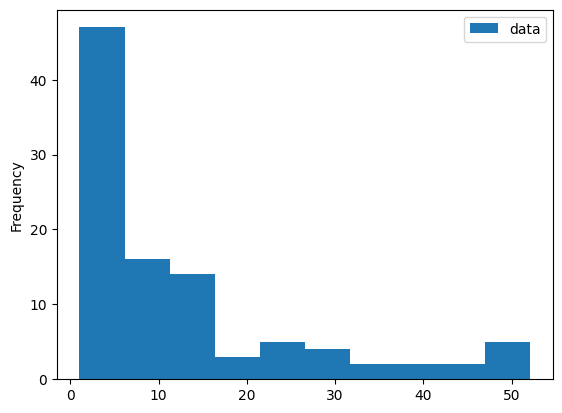

In [28]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

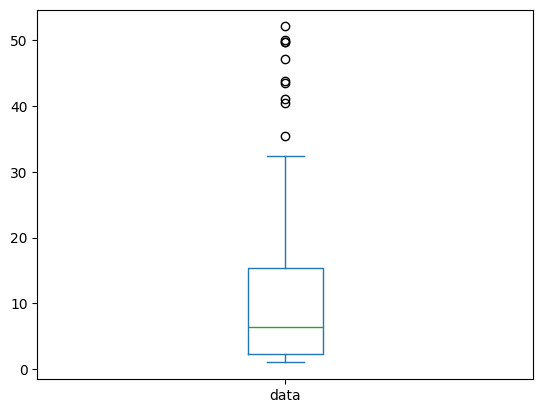

In [29]:
df.plot.box()

The advantages of the representation of the first chart is that you can clearly identify a numerical frequency of the cost of the drugs, for example, that 40+ drugs cost between $1-5. Additionally, it gives a good distribution of the frequency of the drug cost, skewed right. A disadvantage of this chart is that the bins are not completely clear.
<br>
<br>
The advantages of the representation of the second chart is that you can identify in percentages/quartiles the frequency of different drug cost bins. Additionally, it is easier to identify outliers and the median. A disadvantage of the representation in the second chart is that it is not immediately apparent to the untrained eye what the box represents.
<br>
<br>
I would modify these graphs by clearing labeling each axis and providing a chart title. Based on the administrator's use case, I may also add a threshold or color code based on that.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [30]:
import matplotlib.pyplot as plt

In [31]:
df_loan = pd.read_csv("Loan_Default_Data_Train.csv")

In [32]:
df_loan.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [33]:
df_loan_relevant = df_loan[["Yearly_Income", "Unpaid_2_years", "Debt_to_Income", "Lend_Amount", "Interest_Charged", "Usage_Rate", "Inquiries", "Present_Balance", "Gross_Collection", "Account_Open", "Total_Unpaid_CL", "Unpaid_Amount"]]
df_loan_relevant.head()

,Yearly_Income,Unpaid_2_years,Debt_to_Income,Lend_Amount,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Account_Open,Total_Unpaid_CL,Unpaid_Amount
0,633600.00,0,12.5496,42023.25,15.39,88.924,3,607161.90,0.0,17,58598.0,31216.05
1,85483.20,0,9.0048,38133.00,9.94,102.856,0,269234.06,0.0,15,18924.0,11660.49
2,79200.00,0,24.9144,17100.00,22.35,60.372,0,22476.53,0.0,7,15604.0,5637.87
3,61600.00,0,16.5816,5130.00,10.36,116.272,1,15242.09,0.0,9,22410.0,15607.17
4,68053.92,0,40.0512,19665.00,13.68,127.280,1,65433.94,0.0,10,36022.0,27472.86


In [34]:
df_loan_relevant.mean()

Yearly_Income       134831.633700
Unpaid_2_years           0.332691
Debt_to_Income          30.905723
Lend_Amount          25930.123111
Interest_Charged        16.520111
Usage_Rate              95.501859
Inquiries                0.669469
Present_Balance     236072.097224
Gross_Collection        38.311824
Account_Open            12.775651
Total_Unpaid_CL      53315.023987
Unpaid_Amount        29429.314496
dtype: float64

In [35]:
df_loan_relevant.median()

Yearly_Income       114400.0000
Unpaid_2_years           0.0000
Debt_to_Income          30.1056
Lend_Amount          23940.0000
Interest_Charged        16.4900
Usage_Rate              97.0080
Inquiries                0.0000
Present_Balance     138705.1900
Gross_Collection         0.0000
Account_Open            12.0000
Total_Unpaid_CL      39674.0000
Unpaid_Amount        20908.1700
dtype: float64

In [36]:
df_loan_relevant.mode()

,Yearly_Income,Unpaid_2_years,Debt_to_Income,Lend_Amount,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Account_Open,Total_Unpaid_CL,Unpaid_Amount
0,105600.0,0,28.224,17100.0,15.69,0.0,0,0.0,0.0,11,24070.0,0.0


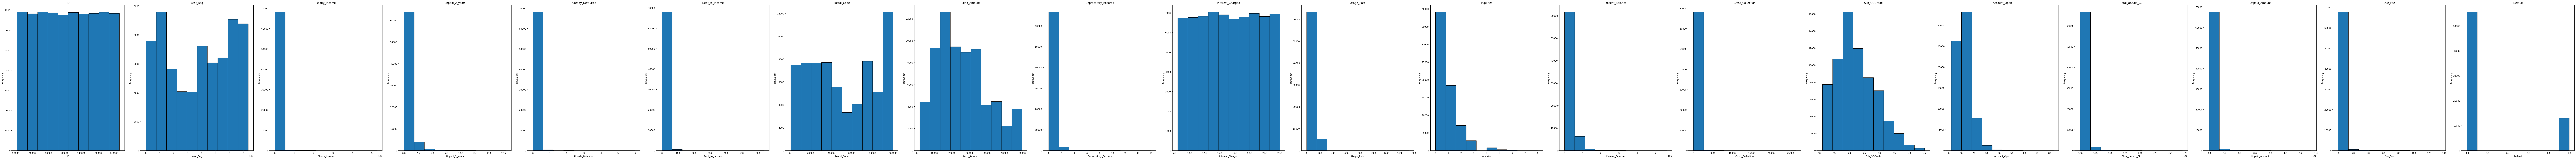

In [48]:
# Getting just the numeric columns
numeric_cols = df_loan.select_dtypes(include='number').columns

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(8 * len(numeric_cols), 10))

# Handle case of a single numeric column
if len(numeric_cols) == 1:
    axes = [axes]

# Plot each numeric column's histogram
for i, col in enumerate(numeric_cols):
    axes[i].hist(df_loan[col].dropna(), bins=10, edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [41]:
print(numeric_cols)

Index(['ID', 'Asst_Reg', 'Yearly_Income', 'Unpaid_2_years',
       'Already_Defaulted', 'Debt_to_Income', 'Postal_Code', 'Lend_Amount',
       'Deprecatory_Records', 'Interest_Charged', 'Usage_Rate', 'Inquiries',
       'Present_Balance', 'Gross_Collection', 'Sub_GGGrade', 'Account_Open',
       'Total_Unpaid_CL', 'Unpaid_Amount', 'Due_Fee', 'Default'],
      dtype='object')


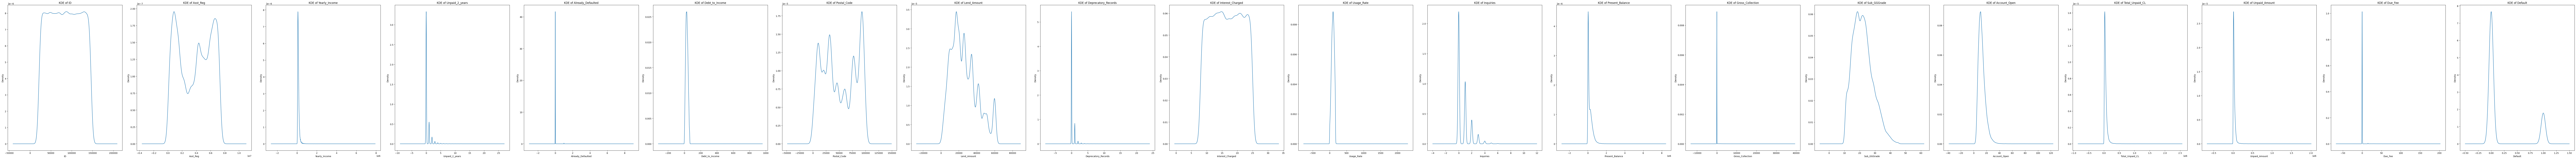

In [38]:
# Set up subplots (1 row, N columns)
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(8 * len(numeric_cols), 10))

# Handle the case where there's only one numeric column
if len(numeric_cols) == 1:
    axes = [axes]

# Loop through each column and plot its KDE
for i, col in enumerate(numeric_cols):
    df_loan[col].dropna().plot.kde(ax=axes[i])
    axes[i].set_title(f'KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

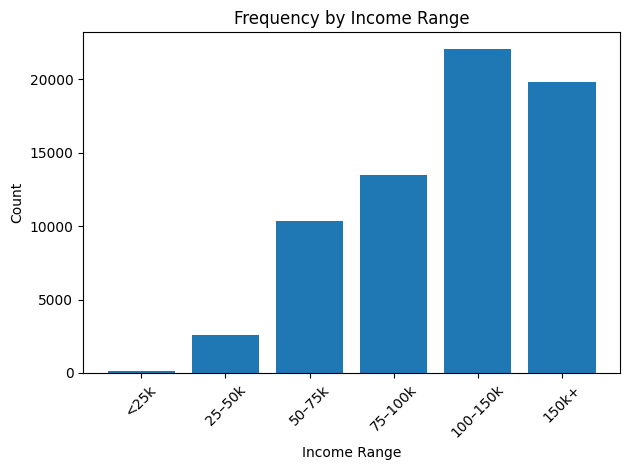

In [39]:
df_loan["Yearly_Income"].dropna()
df_loan["Income_Bin"] = pd.cut(df_loan["Yearly_Income"], bins=[0, 25000, 50000, 75000, 100000, 150000, float("inf")],
                               labels=["<25k", "25–50k", "50–75k", "75–100k", "100–150k", "150k+"])

income_counts = df_loan["Income_Bin"].value_counts().sort_index()

plt.bar(income_counts.index.astype(str), income_counts.values)
plt.title("Frequency by Income Range")
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

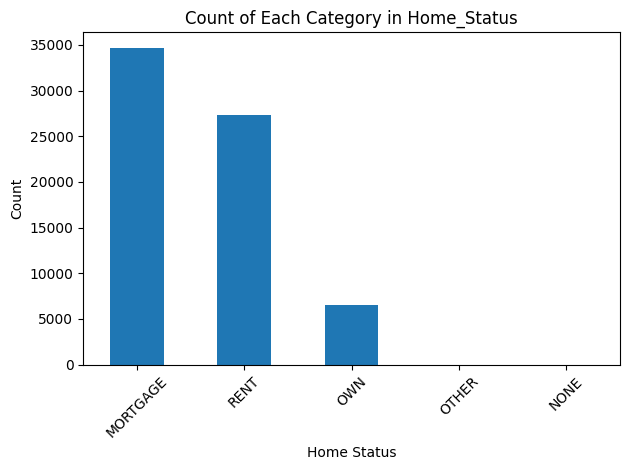

In [43]:
# Get counts of each category
home_status_counts = df_loan["Home_Status"].value_counts()

# Plot the bar chart based on categories
home_status_counts.plot(kind='bar')
plt.xlabel("Home Status")
plt.ylabel('Count')
plt.title(f'Count of Each Category in Home_Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

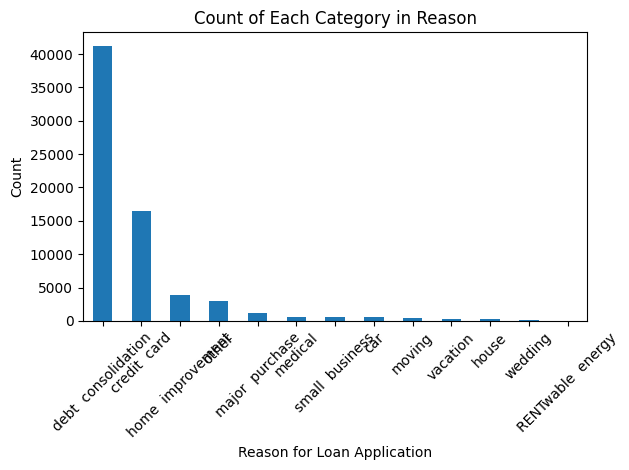

In [45]:
# Get counts of each category
reason_counts = df_loan["Reason"].value_counts()

# Plot the bar chart based on categories
reason_counts.plot(kind='bar')
plt.xlabel("Reason for Loan Application")
plt.ylabel('Count')
plt.title(f'Count of Each Category in Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusions:**

Throughout my examination of the data and its variables, the data was as expected. The distributions for both numerical variables and categorical variables did not provide many surprises. For these reasons, I find the data to be credible and trustworthy.

This dataset will be usable and I will be continuing with it.

Many of the variables appear to skew right.

There are outliers present, especially in the Yearly_Income column.

The bin sizes affect the histogram. The more bins, the more "granular" the distribution. Less bins result in a smoother histogram.

Different columns of the data have different distributions. For example, the Yearly_Income is skewed left as expected while most other variables are skewed right.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

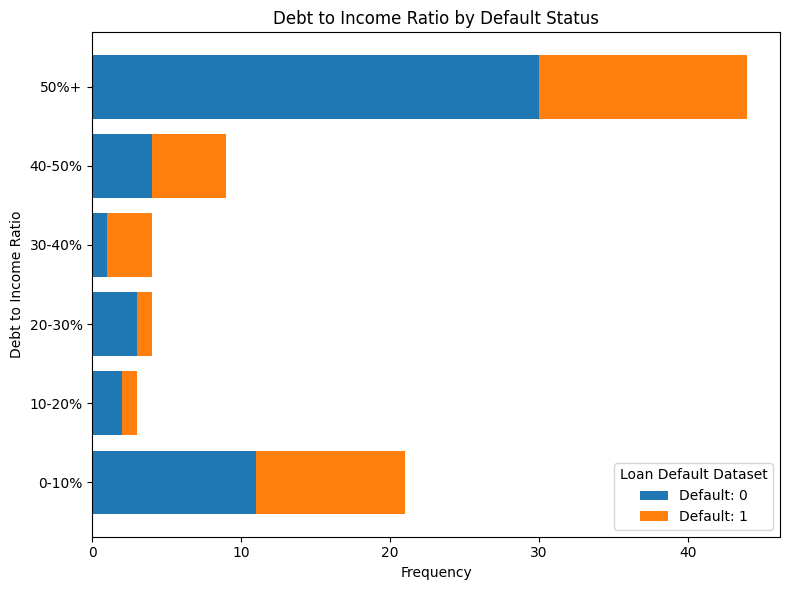

In [40]:
# Creating and labeling the bins
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
df_loan['DTI_bin'] = pd.cut(df_loan['Debt_to_Income'], bins=bins, labels=labels, right=False)

# Grouping by the DTI Ratio field and the default status
grouped = df_loan.groupby(['DTI_bin', 'Default'], observed=True).size().unstack(fill_value=0)

# Plotting details
fig, ax = plt.subplots(figsize=(8, 6))

# Setting up the stacked bar chart
bottom = None
for col in grouped.columns:
    ax.barh(grouped.index, grouped[col], left=bottom, label=f'Default: {col}')
    if bottom is None:
        bottom = grouped[col]
    else:
        bottom += grouped[col]

# Chart labels
ax.set_xlabel('Frequency')
ax.set_ylabel('Debt to Income Ratio')
ax.set_title('Debt to Income Ratio by Default Status')
ax.legend(title='Loan Default Dataset')

plt.tight_layout()
plt.show()

The chart above is based on the survey results chart on page 59, a horizontal stacked bar chart. Instead of percentages out of 100, my chart focuses on the frequency by each debt to income ratio bin.